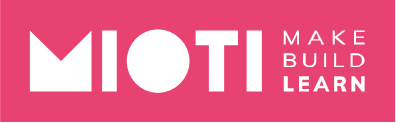
<br/>
<center style="color:#888">Master Deep Learning<br/>Asignatura Computer Vision</center>
<center style="color:#aaa; margin-top:10px;">Prof. Óscar Picazo Montoya<br>oscarpm@faculty.mioti.es</center>


# Challenge S6: Medición de distancias usando visión estéreo

## Objetivos

El objetivo de este challenge es medir distancias en profundidad utilizando técnicas de visión estéreo.



## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import data, io, filters, img_as_ubyte
import cv2
import util_visionestereo_challenge as uvc

import warnings
warnings.filterwarnings("ignore")

### Sistema de visión estéreo

En el laboratorio se ha construido un sistema de visión estéreo y se han calibrado cada una de las cámaras por separado. Se han obtenido los parámetros intrínsecos para la cámara izquierda y derecha (`mtx_left`, `mtx_right`), las distorsiones de cada una de ellas (`dist_left`, `dist_right`) y nos proporcionan también las coordenadas reales del patrón ajedrezado que han usado en la calibración `objpoints` así como las coordenadas en <i>x</i> e <i>y</i> de ese patrón en cada una de las imágenes usadas para calibrarlas (`imgpointsL`, `imgpointsR`).

Todos estos valores nos los han pasado comprimidos en un fichero <i>NPZ</i> de numpy llamado `calibrated.npz` en el mismo directorio del challenge:

In [2]:
npzfile = np.load("calibrated.npz")

objpoints = npzfile['objpoints']
imgpointsL = npzfile['imgpointsL']
imgpointsR = npzfile['imgpointsR']
mtx_left = npzfile['mtx_left']
mtx_right = npzfile['mtx_right']
dist_left = npzfile['dist_left']
dist_right = npzfile['dist_right']

Adicionalmente a este fichero nos proporcionan dos capturas `test1` y `test2`, con la imagen obtenida de la cámara izquierda y derecha en cada una de las capturas y nos preguntan que validemos el sistema de visión estéreo sabiendo que el objeto que se ha colocado en las pruebas está a 85cm en el `test1` y a 105cm en el `test2`.

Estas imágenes están ubicadas en el directorio `imgs` del challenge:

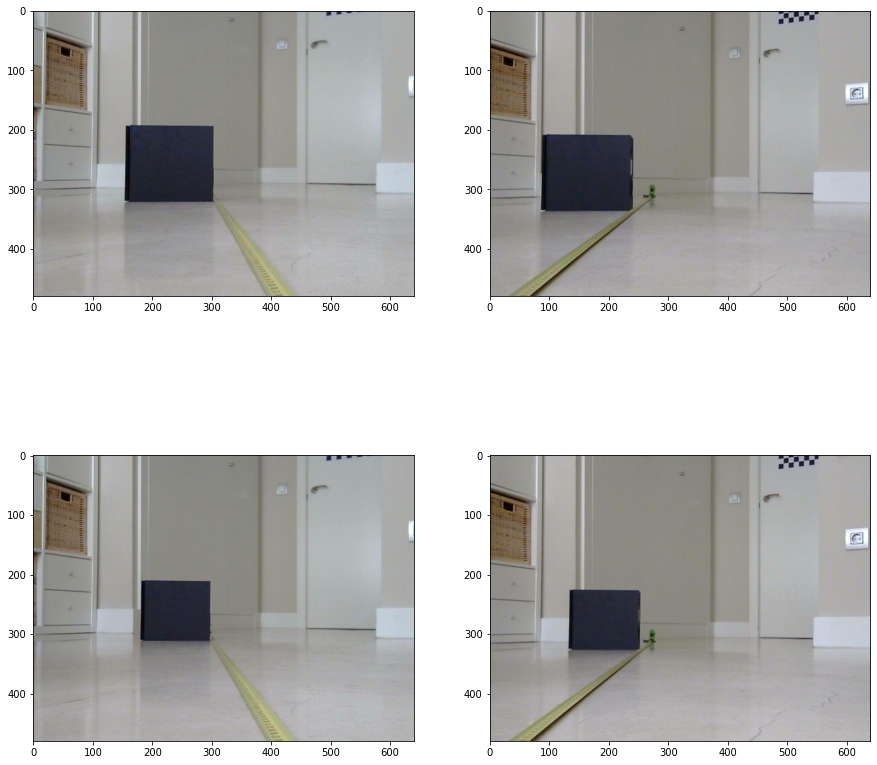

In [3]:
frameL_test1 = io.imread("imgs/img_L_test1.jpg")
frameR_test1 = io.imread("imgs/img_R_test1.jpg")

frameL_test2 = io.imread("imgs/img_L_test2.jpg")
frameR_test2 = io.imread("imgs/img_R_test2.jpg")

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,15))
ax1[0].imshow(frameL_test1)
ax1[1].imshow(frameR_test1)
ax2[0].imshow(frameL_test2)
ax2[1].imshow(frameR_test2)
io.show()


### Calibración estéreo

A partir de los datos que se disponen de las cámaras, obtén las matrices `R` y `T` necesarias para rectificar cada par de imágenes:

Calcula los mapas de rectificación `Left_Stereo_Map` y `Right_Stereo_Map`, necesarios para rectificar cualquier imagen capturada por las cámaras izquierda y derecha:

Crea una función que a partir de las imágenes izquierda y derecha y los mapas de rectificación, nos devuelva los mapas de disparidad de la imagen izquierda con respecto a la derecha, las imágenes izquierda y derecha rectificadas, así como los valores de disparidad.

In [ ]:
def obtenerMapasDeDisparidadYValores (img_left, img_right, Left_Stereo_Map, Right_Stereo_Map):
    
    # Implementa una función que a partir de las imágenes izquierda y derecha y los mapas de rectificación, 
    # nos devuelva los mapas de disparidad de la imagen izquierda con respecto a la derecha, 
    # las imágenes izquierda y derecha rectificadas, así como los valores de disparidad.
   
    # Rectificar imágenes
    

    # Convertir a escala de grises las dos imágenes rectificadas
    
    
    # Crear objecto StereoSGBM
    # stereo = ...
    
    # Calcular las disparidades
    # disp = ...
    
    # Calcular los valores normalizados de la disparidad
    disp_values = np.copy (disp)   
    disp_values = disp_values.astype(float)
    disp_values = (disp_values - min_disp) / (16.0 * num_disp)
    
    # Calcular el mapa de disparidad normalizando entre 0 y 255 para visualizar
    # disp_norm = ...
    
    # Crear objecto StereoSGBM equivalente para la cámara derecha a partir del ya creado para el de la izquierda
    # stereoR = ...
    
    # Calcular las disparidades
    # dispR = ...
    
    # Crear objeto para el filtro de disparidad WLS
    # wls_filter = ...

    # Aplicar el filtro
    # dispFiltered = ...

    # La función devuelve el mapa de disparidad normalizado entre 0 y 255 para visualizar, 
    # el mapa de disparidad mejorado con el filtro WLS, los valores de disparidad, la imagen izquierda en escala
    # de grises y la imagen derecha en escala de grises
    return disp_norm, dispFiltered, disp_values, grayFrameLRec, grayFrameRRec

Se muestran los mapas de disparidad (el normal y el mejorado), así como la imagen de la cámara izquierda rectificada:

In [ ]:
disp_image, disp_image_filtered, disp_values, image_L_rec, image_R_rec = obtenerMapasDeDisparidadYValores (frameL_test1, frameR_test1, Left_Stereo_Map, Right_Stereo_Map)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(disp_image, cmap=plt.cm.gray)
ax2.imshow(disp_image_filtered, cmap=plt.cm.gray)
ax3.imshow(image_L_rec, cmap=plt.cm.gray)
io.show()

A partir de los valores de disparidad `disp_values` y distintas imágenes controladas, se ha creado un modelo que nos devuelve la distancia en función de los valores de disparidad. Puedes comprobar como se ha definido este modelo en el fichero `util_visionestereo_challenge.py` que acompaña el challenge:

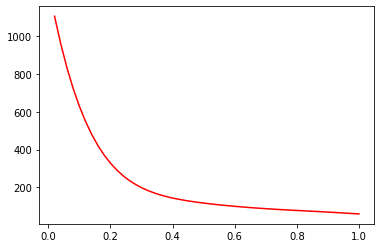

In [4]:
model = uvc.Disparidad2Distancia()
model.plot()

El siguiente problema a resolver sería aislar el objeto que queremos reconocer para obtener sus valores de disparidad. En este caso te recomiendo que utilices las técnicas de binarización sobre la imagen rectificada izquierda y uses el algoritmo de detección de blobs `label` junto con `regionprops` que ya hemos utilizado en otras sesiones.

Crea una función que a partir de una imagen, nos retorne el rectángulo de ocupación en píxeles del objeto del que queremos medir su distancia:

In [ ]:
from skimage.morphology import dilation
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import disk
from skimage.util import invert

def obtenerLimitesObjeto (img_gris_rectificada):
    
    # Implementa una función que devuelva un rectángulo con las coordenadas del objeto
    
    # Binariza la imagen
    
    # Aplica un filtro de dilatación para reducir el área y evitar problemas con los límites del objeto
    
    # Aplica `label` para obtener los blobs
    
    # Calcula las regiones de interés y devuélvelas en una variable llamada "rois"
    
    
    # Tendremos que encontrar cual es el roi que coincide con el objeto, te propongo este algoritmo:
    for roi in rois:
        if roi.area / roi.bbox_area > 0.85 and roi.bbox_area > 1000:
            return roi.bbox
        
    return (0,0,0,0)

Vamos a comprobar si el resultado es el correcto. Pintemos un rectángulo con las coordenadas obtenidas en la imagen donde hemos buscado el objeto y en el mapa de disparidad:

In [ ]:
rect_obj = obtenerLimitesObjeto(image_L_rec)

print (rect_obj)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(image_L_rec, cmap=plt.cm.gray)
rect=mpatches.Rectangle((rect_obj[1],rect_obj[0]),rect_obj[3]-rect_obj[1],rect_obj[2]-rect_obj[0], 
                        fill = False,
                        color = "red",
                        linewidth = 2)
ax1.add_patch(rect)
ax2.imshow(disp_image, cmap=plt.cm.gray)
rect=mpatches.Rectangle((rect_obj[1],rect_obj[0]),rect_obj[3]-rect_obj[1],rect_obj[2]-rect_obj[0], 
                        fill = False,
                        color = "red",
                        linewidth = 2)
ax2.add_patch(rect)
io.show()

Veamos un histograma de los valores de las disparidades en esa región: 

In [ ]:
rango = disp_values[rect_obj[0]:rect_obj[2], rect_obj[1]:rect_obj[3]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
ax1.imshow(rango, cmap=plt.cm.gray, vmin=0.0, vmax=1.0)
ax2.hist(rango, bins=10)
io.show()

Implementa una función que nos devuelva un valor de disparidad a partir de una matriz de disparidades. Nos interesaría buscar el valor medio entre los valores más repetidos (observa el histograma):

In [ ]:
def obtenerDisparidad (disparidades):

    disparidad = 0.0
    # Implementa una función que nos devuelva el valor de disparidad entre todas las disparidades de la matriz
    return disparidad

El valor de la distancia entre el objeto detectado y las cámaras de visión estéreo sería:

In [ ]:
print ("La distancia al objeto es de: ", model.obtenerDistancia(obtenerDisparidad (rango)), "cm")

Repite todo el proceso que hemos hecho para las imágenes que corresponden al `test2`, no vuelvas a definir las funciones que hemos construido, utilízalas directamente. 

Evalua el resultado de la distancia al objeto y comenta los resultados y el proceso que hemos seguido.